<a href="https://colab.research.google.com/github/alexcohenn23/bio108tutorial/blob/main/Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BIOL108: Tutorial

## Inspiration of Tutorial + Peer-Reviewed Citation & Dataset


This tutorial is inspired by the folllowing paper:

Sánchez‐Clavijo, Lina María; Bayly, Nicholas James; Quintana‐Ascencio, Pedro Francisco (2019), Habitat selection in transformed landscapes and the role of forest remnants and shade coffee in the conservation of resident birds, Journal of Animal Ecology, Article-journal, https://doi.org/10.1111/1365-2656.13108

** data available at https://datadryad.org/dataset/doi:10.5061/dryad.mp5rn5b#usage

The paper is built around answering species persistance in tropical birds. Namely, whether those who face a loss of habitat have a preference torward shade coffee farms and how said habitat affects species' performance. At the same time, the paper also hypothesizes the extent to which shade coffee plants contribute to the conservation of resident birds versus native forests. The data is collected in Hacienda La Victoria in Magdalena, Colombia.


Despite the researchers' investigation in to the subject, their collection and statistical analysis data proved to be largely inconclusive. This was mostly due to 70% of statistical tests signaling unclear differences between the forests vs shade coffee habitats (and limited adjustments for confounding variables). On top of this, about half of species from the remaining statistcal tests proved to be generalist species—no preference or superior performance in either habitat. From the small sample size of results that remained, it was concluded that species generally favored forests (5 of 7 species) and 4 of those 5 species performed better in forests. So, while shade coffee may be more conservation friendly than other agricultural land, it is still generally less effective than tropical forests. The study was also inconclusive in finding any sort of pattern identifying any characteristics that would leave tropical birds more susceptible to human activities (ie. deforestation and converting forest land to shade coffee land cover).

## Main Objectives & Motivation of Tutorial:



From the findings of the paper, I sought to further explore how birds are adapting to deforestation. Mainly, this tutorial is built around discovering the following main objectives:

  * How much more effective are forests are conserving bird species than shade coffee habitats? Does this number change over the 7-year span of the study?

  * Is there a difference in how popular a habitat is by age (ie. are birds in shade coffee areas typically younger?)

  * As deforestation becomes a larger issue, is there a change in frequency of bird spottings in each habitat (ie. does the proportion of birds found in forests substantially change from 2009 to 2015?)

Motivation:

Research suggests that approximately 40-75% of all species are indigenous to tropical rainforests [(NPS.gov)](https://www.nps.gov/teachers/classrooms/wildlife-of-the-tropical-rainforests.htm#:~:text=Background,plant%20species%20on%20the%20planet.). At the same time, estimates suggest that more than 1 in 8 bird species face extinction [(BirdLife International)](https://datazone.birdlife.org/articles/one-in-eight-of-all-bird-species-is-threatened-with-global-extinction) with roughly two-thrids of bird species residing in forests—many uniquely found in one habitat/forest. As a result, it is important to determine how changes in the landscape of tropical forests are effecting bird species and their ability to adapt.

For the specific dataset used for this analysis, it is critical to analyze how effective tropical forest substitutes, like shade coffee land, are at conserving and supporting exisitng bird species in the region. Through statistical analysis, we can gain a better idea at birds' ability to adapt to shade coffee environments and the habitat's ability to support bird species relative to tropical rainforests.



## Pre-Processing Data in Python

In [176]:
''' For this week's analysis, I will be primarily utilizing the pandas and numpy packages
in order to graph any of the data from the peer-reviewed paper as all the data are CSV files.  '''

import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import plotly.express as px

import seaborn as sns

from pandas import Series, DataFrame

import statsmodels.api as sm

In [3]:
'''To import the data, I will be sourcing it from my Google Drive. To effectively
complete this, I am first importing my drive into this Colab Notebook before mounting my drive.'''

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
''' Next, I will be importing the four data files from
my drive using their designated pathways.
 '''

capture_hist = '/content/drive/MyDrive/BIOL108/doi_10_5061_dryad_mp5rn5b__v20191202/SanchezClavijo_etal2019_capture_histories.csv'

bird_character = '/content/drive/MyDrive/BIOL108/doi_10_5061_dryad_mp5rn5b__v20191202/SanchezClavijo_etal2019_individual_characteristics.csv'

observation_hist = '/content/drive/MyDrive/BIOL108/doi_10_5061_dryad_mp5rn5b__v20191202/SanchezClavijo_etal2019_observation_histories.csv'

perform_analysis = '/content/drive/MyDrive/BIOL108/doi_10_5061_dryad_mp5rn5b__v20191202/SanchezClavijo_etal2019_performance_metanalysis.csv'

In [5]:
# Converting file to a pandas csv file to manipulate later on:

capt_hist = pd.read_csv(capture_hist)

bird_char = pd.read_csv(bird_character)

obs_hist = pd.read_csv(observation_hist)

perf_analysis = pd.read_csv(perform_analysis)


### Pre-Processing bird_char

Goal with bird characteristcis file with pre-processing data:

Seperate by year to determine if there is an increasing trend of % of sightings in dif locations
  At same time, determine if birds are become stronger in coffee habitats from 2009 to 2015 (using stats and p-value for bias/significannce)

eventually, use stats/ML to predict/estimate future projections of whether birds will be able to survive equally successfully


Seperate by age (are younger birds going to forests/coffee at high proportion than lower ages?)





In [6]:
bird_char

,Species,Year,Season,Day,Habitat,AGE,BRE,PPM,MUS,BM,WC
0,Basileuterus_rufifrons,2009,FALL,204,FOREST,3,NO,STATIC,2.0,10.3,53.0
1,Basileuterus_rufifrons,2009,FALL,205,FOREST,4,NO,STATIC,3.0,10.7,59.0
2,Basileuterus_rufifrons,2009,FALL,205,FOREST,4,NaN,STATIC,2.0,10.9,54.0
3,Basileuterus_rufifrons,2009,FALL,221,FOREST,3,NO,STATIC,2.0,10.4,57.0
4,Basileuterus_rufifrons,2009,FALL,226,FOREST,3,NO,STATIC,2.0,10.1,53.0
...,...,...,...,...,...,...,...,...,...,...,...
4991,Turdus_flavipes,2015,SPRING,56,FOREST,4,YES,STATIC,2.0,51.0,114.0
4992,Turdus_flavipes,2015,SPRING,56,FOREST,4,YES,STATIC,2.0,50.8,112.0
4993,Turdus_flavipes,2015,SPRING,58,FOREST,3,NO,STATIC,2.0,48.5,104.0
4994,Turdus_flavipes,2015,SPRING,59,FOREST,4,YES,STATIC,2.0,47.3,107.0


In [7]:
# Goal 1: Seperate By Year

'''The commmands below are basically filtering out the rows by saying if
the column year == year x, keep, otherwise disregard
'''

# ** live coding part maybe(?) -

bird_char2015 = bird_char[bird_char['Year'] == 2015]

bird_char2014 = bird_char[bird_char['Year'] == 2014]

bird_char2013 = bird_char[bird_char['Year'] == 2013]

bird_char2012 = bird_char[bird_char['Year'] == 2012]

bird_char2011 = bird_char[bird_char['Year'] == 2011]

bird_char2010 = bird_char[bird_char['Year'] == 2010]

bird_char2009 = bird_char[bird_char['Year'] == 2009]


In [8]:
'''Goal 2: Seperate by Age; Age of 0 is unknown, so these values will all be discarded.
Then, we will create 3 new variables, holding the indices when the bird is juvenile (age == 2), immature (age == 3), and an adult (age ==4).
The ultimate goal by sorting this data is to later chart whether there is a correlation/influence of birds' habitat based on their age.
At the same, we want to use these new variables and the variables grouped by year to analyze whether birds in shade coffee habitats are adapting
better / becoming more fit (or approaching that of birds who reside in forests).


** This will also become a live coding tutorial based on last example (after draft is submitted)
'''

bird_charJuv = bird_char[bird_char['AGE'] == 2]

bird_charImm = bird_char[bird_char['AGE'] == 3]

bird_charAdu = bird_char[bird_char['AGE'] == 4]

bird_charJuv

,Species,Year,Season,Day,Habitat,AGE,BRE,PPM,MUS,BM,WC
92,Basileuterus_rufifrons,2011,SUMMER,134,COFFEE,2,NO,STATIC,NaN,10.8,56.0
94,Basileuterus_rufifrons,2011,SUMMER,135,COFFEE,2,NO,ACTIVE,NaN,11.9,52.0
102,Basileuterus_rufifrons,2011,SUMMER,150,FOREST,2,NO,STATIC,NaN,11.1,54.0
104,Basileuterus_rufifrons,2011,SUMMER,151,FOREST,2,NO,STATIC,NaN,11.0,55.0
201,Basileuterus_rufifrons,2013,SPRING,39,FOREST,2,NO,STATIC,2.0,9.7,52.0
...,...,...,...,...,...,...,...,...,...,...,...
4803,Turdus_flavipes,2013,SUMMER,141,FOREST,2,NO,STATIC,1.0,51.8,107.0
4919,Turdus_flavipes,2014,SUMMER,111,COFFEE,2,NO,ACTIVE,1.0,47.8,105.0
4923,Turdus_flavipes,2014,SUMMER,117,FOREST,2,NO,STATIC,2.0,44.8,109.0
4934,Turdus_flavipes,2014,SUMMER,134,FOREST,2,NO,ACTIVE,2.0,48.2,105.0


## Analytical Approach

The main goal of our analysis is to compare which habitat birds are appearing in more frequently, and whether or not this changes over time. At the same time, we are looking into seeing if birds of different ages have difference preferences and, in general, if this is supported by how healthy the birds are (measured through mass).


> This implemention will include a variety of plots/types of analysis, including grouped bar charts, scatterplots, and linear regression plots. Through this, we will achieve a better understanding of how birds are interacting with their native environments and potential substitutes as the implications of deforestation/climate change progress.

  

## Implementing Analysis

In [9]:
bird_charImm

,Species,Year,Season,Day,Habitat,AGE,BRE,PPM,MUS,BM,WC
0,Basileuterus_rufifrons,2009,FALL,204,FOREST,3,NO,STATIC,2.0,10.3,53.0
3,Basileuterus_rufifrons,2009,FALL,221,FOREST,3,NO,STATIC,2.0,10.4,57.0
4,Basileuterus_rufifrons,2009,FALL,226,FOREST,3,NO,STATIC,2.0,10.1,53.0
5,Basileuterus_rufifrons,2009,FALL,243,COFFEE,3,NaN,STATIC,2.0,10.8,57.0
6,Basileuterus_rufifrons,2009,FALL,243,COFFEE,3,NaN,STATIC,2.0,9.8,53.0
...,...,...,...,...,...,...,...,...,...,...,...
4968,Turdus_flavipes,2015,SPRING,39,FOREST,3,NO,STATIC,2.0,44.4,99.0
4977,Turdus_flavipes,2015,SPRING,42,FOREST,3,YES,STATIC,2.0,54.0,109.0
4982,Turdus_flavipes,2015,SPRING,45,FOREST,3,NO,STATIC,3.0,57.1,110.0
4989,Turdus_flavipes,2015,SPRING,50,FOREST,3,YES,STATIC,2.0,58.9,105.0


### Creating histograms of bird sightings in each environment each year (seperated by age):


The goal of the of the histograms is to gain a brief understanding of the data before plotting it for a closer analysis.

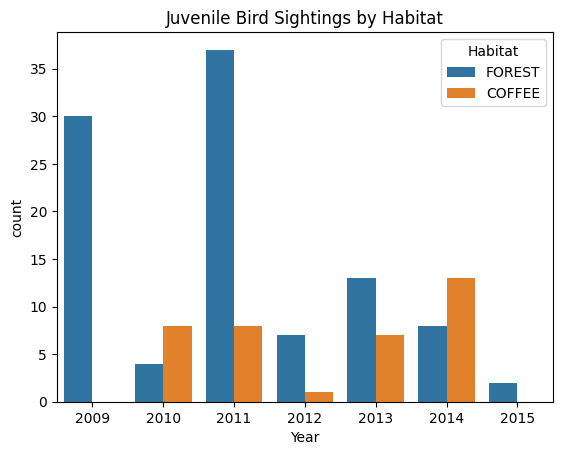

In [10]:
sns.countplot(bird_charJuv, x="Year", hue="Habitat")

plt.title('Juvenile Bird Sightings by Habitat')

plt.show()

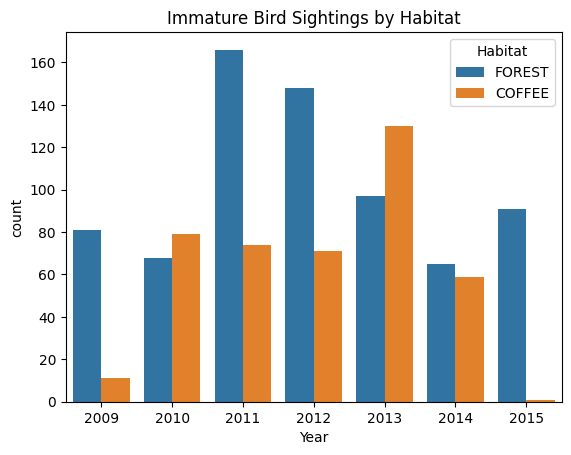

In [11]:
sns.countplot(bird_charImm, x="Year", hue="Habitat")

plt.title('Immature Bird Sightings by Habitat')

plt.show()


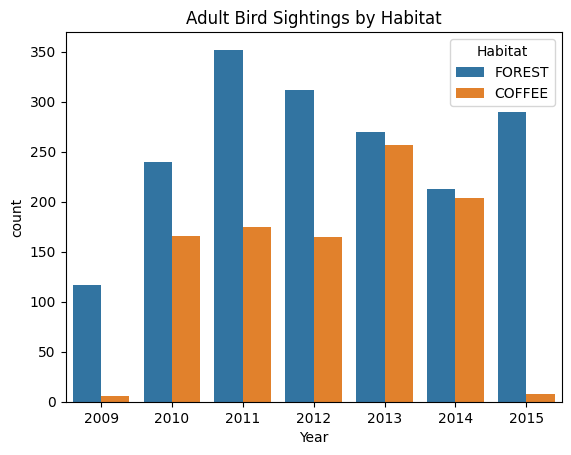

In [12]:
sns.countplot(bird_charAdu, x="Year", hue="Habitat")

plt.title('Adult Bird Sightings by Habitat')

plt.show()

### Further analysis:

** While not explicitly mentioned in the data set, the abnormly low counts of birds in shade coffee habitats in 2009 and 2015 across all ages suggests that there may have been a lesser focus on observing birds in shade coffee habitats in 2009 and 2015. As a result, for the sake of this analysis, data from 2009 and 2015 will be ignored.

From here, the first goal is to understand how the proportion of birds in each environment change YoY from 2010 to 2015.



#### The work for finding the change in the Forest:Coffee habitat proportion uses  the value_counts() function for the pandas dataframes.

##### all ages:

In [13]:
bird_char2010.Habitat.value_counts()

# The general equation used is value count of coffee divided by the sum of total counts (Coffee/ coffee + forest)


CofProp2010 = bird_char2010.Habitat.value_counts()['COFFEE']/(bird_char2010.Habitat.value_counts()['FOREST'] + bird_char2010.Habitat.value_counts()['COFFEE'])
CofProp2010

np.float64(0.3960526315789474)

In [14]:
bird_char2011.Habitat.value_counts()

CofProp2011 = bird_char2011.Habitat.value_counts()['COFFEE']/(bird_char2011.Habitat.value_counts()['FOREST'] + bird_char2011.Habitat.value_counts()['COFFEE'])
CofProp2011

np.float64(0.28326612903225806)

In [15]:
bird_char2012.Habitat.value_counts()

CofProp2012 = bird_char2012.Habitat.value_counts()['COFFEE']/(bird_char2012.Habitat.value_counts()['FOREST'] + bird_char2012.Habitat.value_counts()['COFFEE'])

CofProp2012

np.float64(0.3105022831050228)

In [16]:
bird_char2013.Habitat.value_counts()

CofProp2013 =  bird_char2013.Habitat.value_counts()['COFFEE']/(bird_char2013.Habitat.value_counts()['FOREST'] + bird_char2013.Habitat.value_counts()['COFFEE'])
CofProp2013

np.float64(0.4881889763779528)

In [17]:
bird_char2014.Habitat.value_counts()

CofProp2014 = bird_char2014.Habitat.value_counts()['COFFEE']/(bird_char2014.Habitat.value_counts()['FOREST'] + bird_char2014.Habitat.value_counts()['COFFEE'])
CofProp2014

np.float64(0.4553314121037464)

##### 2010:

In [18]:
bird10_sorted = bird_char2010[['Habitat', 'AGE']].value_counts()
bird10_sorted

Habitat  AGE
FOREST   4      240
COFFEE   4      166
FOREST   0      147
COFFEE   3       79
FOREST   3       68
COFFEE   0       48
         2        8
FOREST   2        4
Name: count, dtype: int64

In [19]:
JuvCofProp2010 = 8/12
ImmCofProp2010 = 79/(68+79)
AdCofProp2010 =166/(240 + 166)

##### 2011:

In [20]:
bird11_sorted = bird_char2011[['Habitat', 'AGE']].value_counts()
bird11_sorted

Habitat  AGE
FOREST   4      352
COFFEE   4      175
FOREST   3      166
         0      156
COFFEE   3       74
FOREST   2       37
COFFEE   0       24
         2        8
Name: count, dtype: int64

In [21]:
JuvCofProp2011 = 8/(37 + 8)
ImmCofProp2011 = 74/(74 + 166)
AdCofProp2011 = 175/(352 + 175)

##### 2012:

In [22]:
bird12_sorted = bird_char2012[['Habitat', 'AGE']].value_counts()
bird12_sorted

Habitat  AGE
FOREST   4      312
COFFEE   4      165
FOREST   3      148
         0      137
COFFEE   3       71
         0       35
FOREST   2        7
COFFEE   2        1
Name: count, dtype: int64

In [23]:
JuvCofProp2012 = 1/8
ImmCofProp2012 = 71/(71 + 148)
AdCofProp2012 = 165/(240 + 165)

##### 2013:

In [24]:
bird13_sorted = bird_char2013[['Habitat', 'AGE']].value_counts()
bird13_sorted

Habitat  AGE
FOREST   4      270
COFFEE   4      257
         3      130
FOREST   3       97
         0       75
COFFEE   0       40
FOREST   2       13
COFFEE   2        7
Name: count, dtype: int64

In [25]:
JuvCofProp2013 = 7/20
ImmCofProp2013 = 130/(130 + 97)
AdCofProp2013 = 257/(257 + 270)

##### 2014:

In [26]:
bird14_sorted = bird_char2014[['Habitat', 'AGE']].value_counts()
bird14_sorted

Habitat  AGE
FOREST   4      213
COFFEE   4      204
FOREST   0       92
         3       65
COFFEE   3       59
         0       40
         2       13
FOREST   2        8
Name: count, dtype: int64

In [27]:
JuvCofProp2014 = 8/21
ImmCofProp2014 = 59/(59 + 65)
AdCofProp2014 = 204/(213 + 204)

#### Plotting the Calculations From Above:

From Here, Our Next Goal is to Plot the Calculations above on a scatter plot to better understand how birds are interacting with Shade Coffee environments relative to their age and over time. After creating the plot, we will plot a line of best fit.

In [156]:
# Step 1: create new pandas data frame

data = {'Year': [2010,2011,2012,2013,2014], 'All Birds': [CofProp2010, CofProp2011, CofProp2012, CofProp2013, CofProp2014],
        'Juvenile' :[JuvCofProp2010, JuvCofProp2011, JuvCofProp2012, JuvCofProp2013, JuvCofProp2014],
        'Immature' :[ImmCofProp2010, ImmCofProp2011, ImmCofProp2012, ImmCofProp2013, ImmCofProp2014],
        'Adult' :[AdCofProp2010, AdCofProp2011, AdCofProp2012, AdCofProp2013, AdCofProp2014]}

CoffeeProp = pd.DataFrame(data)

CoffeeProp

,Year,All Birds,Juvenile,Immature,Adult
0,2010,0.396053,0.666667,0.537415,0.408867
1,2011,0.283266,0.177778,0.308333,0.332068
2,2012,0.310502,0.125000,0.324201,0.407407
3,2013,0.488189,0.350000,0.572687,0.487666
4,2014,0.455331,0.380952,0.475806,0.489209


In [29]:
## Plotting Results:
'''Here, we are using the plotly.express package (px) in order to create a more interactive plot
    using y = [list] we are able to plot multiple variables at the same time against the x variable
    the labels function allows us to rename variables through a dictionary to give greater context
'''
fig = px.scatter(CoffeeProp,
                 x='Year', y = ['All Birds', 'Juvenile', 'Immature', 'Adult'],
                 title='Proportion of Birds Observed in Shade Coffee Habitat',
                 labels = {'Year': 'Year', 'value': 'Coffee/(Total Bird Count)', 'variable': 'Age of the Bird'}
                 )
fig.show()

`To get a clearer picture of how the proportion of birds residing in shade coffee habitats changed over the five year span, we will use the seaborn package to plot a line of best fit

In [30]:
# Before Calculating we need to reformat the structure of
# the CoffeeProp dataframe:

dataLR = {'Year':[], 'Age':[], 'C/T': []}

'''to effectively do this, we will utilize three seperate four loops
to restructure the formatting of the data by resorting it through a new dictionary,
dataLR
'''

for i in range(0,20):
  x = '201' + str(i//4)
  dataLR['Year'].append(int(x))

# ** 2nd & 3rd for loops will be converted to live coding for tutorial

for i in range(0,5):
  dataLR['Age'].append('All Birds')
  dataLR['Age'].append('Juvenile')
  dataLR['Age'].append('Immature')
  dataLR['Age'].append('Adult')

for i in range(0,5):
  dataLR['C/T'].append(CoffeeProp['All Birds'][i])
  dataLR['C/T'].append(CoffeeProp['Juvenile'][i])
  dataLR['C/T'].append(CoffeeProp['Immature'][i])
  dataLR['C/T'].append(CoffeeProp['Adult'][i])

dataLR

{'Year': [2010,
  2010,
  2010,
  2010,
  2011,
  2011,
  2011,
  2011,
  2012,
  2012,
  2012,
  2012,
  2013,
  2013,
  2013,
  2013,
  2014,
  2014,
  2014,
  2014],
 'Age': ['All Birds',
  'Juvenile',
  'Immature',
  'Adult',
  'All Birds',
  'Juvenile',
  'Immature',
  'Adult',
  'All Birds',
  'Juvenile',
  'Immature',
  'Adult',
  'All Birds',
  'Juvenile',
  'Immature',
  'Adult',
  'All Birds',
  'Juvenile',
  'Immature',
  'Adult'],
 'C/T': [np.float64(0.3960526315789474),
  np.float64(0.6666666666666666),
  np.float64(0.5374149659863946),
  np.float64(0.4088669950738916),
  np.float64(0.28326612903225806),
  np.float64(0.17777777777777778),
  np.float64(0.30833333333333335),
  np.float64(0.33206831119544594),
  np.float64(0.3105022831050228),
  np.float64(0.125),
  np.float64(0.3242009132420091),
  np.float64(0.4074074074074074),
  np.float64(0.4881889763779528),
  np.float64(0.35),
  np.float64(0.5726872246696035),
  np.float64(0.4876660341555977),
  np.float64(0.4553314121

As you can see from the code above, we created a dictionary that we will then convert to a pandas dataframe with the columns correlating to the three Keys (year, age, and coffee/total proportion) and the values will be the data in the dataframe.

In [157]:
## Since this was done previously, this will also become live coding
# during the actual tutorial:

CoffeePropLR = pd.DataFrame(dataLR)

CoffeePropLR

,Year,Age,C/T
0,2010,All Birds,0.396053
1,2010,Juvenile,0.666667
2,2010,Immature,0.537415
3,2010,Adult,0.408867
4,2011,All Birds,0.283266
5,2011,Juvenile,0.177778
6,2011,Immature,0.308333
7,2011,Adult,0.332068
8,2012,All Birds,0.310502
9,2012,Juvenile,0.125000


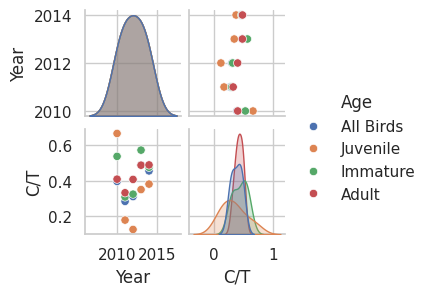

In [158]:
# Using the pairplots method to get a brief overview of the relation between the variables in the CoffeePropLR dataset

sns.pairplot(CoffeePropLR, hue='Age', height=1.5);


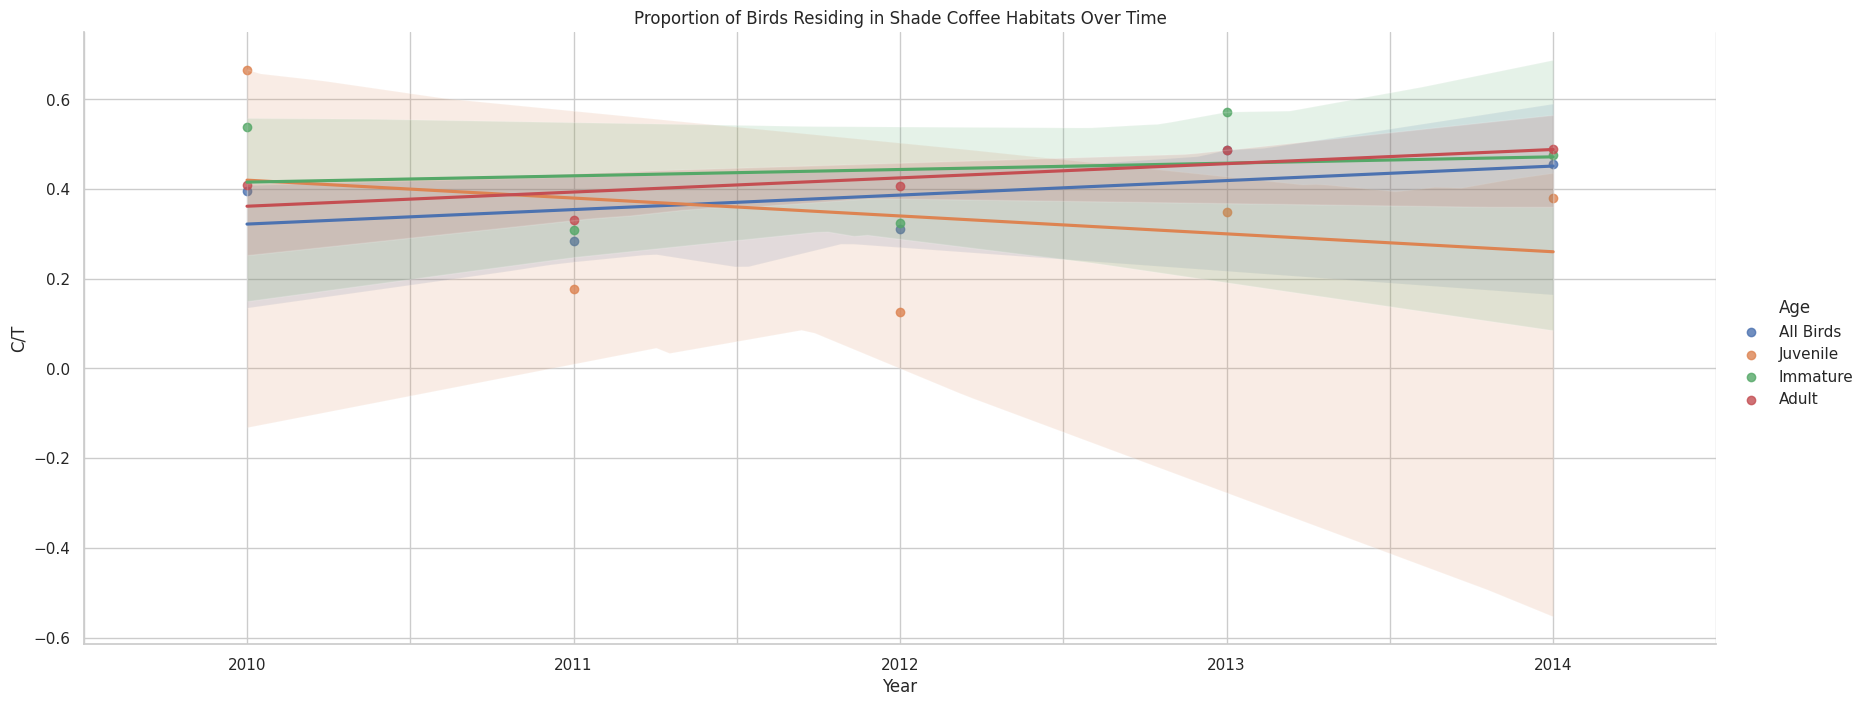

In [161]:
# using seaborn package to create same plot as before but now with best fit lines (& bars of error)

#initial setup for seaborn plot
sns.set()
sns.set_style('whitegrid')

ax = sns.lmplot(data = CoffeePropLR, y = 'C/T', x = 'Year', hue = 'Age', height = 7, aspect = 2.5)

# .set(title = ) function allows there to be a title in the seaborn plot
ax.set(title = 'Proportion of Birds Residing in Shade Coffee Habitats Over Time')

#Through the set_xticklabels we are able to remove there being any half years (ie. 2010.5)—achieving a cleaner graph
ax.set_xticklabels(['',2010,'',2011,'',2012,'',2013,'',2014,''])

### Does the Performance/Growth of Birds Support the Graph Above?

From the graph above, we can see a trend that in general, all birds were relatively found increasingly often in Shade Coffee habitats and therefore less in their native tropical forests. When looking at the age breakdown, this remains true for Immature and Adult birds. Juvenile birds, however, were found on average increasingly less in Shade Coffee habitats.

Since the number of observations are relatively limited due to only spanning 5 years (2010 - 2014), any outliers or data that could be overly inflated/deflated due to confounding variables has a large potential to skew the results. This can be seen in the large translucent bars surrounding the lines of best fit.

To address this, or look more closely at this, we can use the bird characteristics dataset to analyze how the wing chord length and body mass changed. Specifically, we can plot these two quantities for birds in each age group over the same 5 year span and compare how they changed for birds residing in Shade Coffee environments in comparison to those in their native tropical forests (which will act as the control). Additionally, we can look at the breeding habits of birds in each environment to understand how successfully each environment can support life.

In [34]:
'''quick reminder of what is in the bird_char variable
BM = body mass (grams)
we are not using the MUS (muscle) index since it is largely dependent
on the bird species and the scale is only 1,2, or 3 (vast majority are 3)
'''

bird_char

,Species,Year,Season,Day,Habitat,AGE,BRE,PPM,MUS,BM,WC
0,Basileuterus_rufifrons,2009,FALL,204,FOREST,3,NO,STATIC,2.0,10.3,53.0
1,Basileuterus_rufifrons,2009,FALL,205,FOREST,4,NO,STATIC,3.0,10.7,59.0
2,Basileuterus_rufifrons,2009,FALL,205,FOREST,4,NaN,STATIC,2.0,10.9,54.0
3,Basileuterus_rufifrons,2009,FALL,221,FOREST,3,NO,STATIC,2.0,10.4,57.0
4,Basileuterus_rufifrons,2009,FALL,226,FOREST,3,NO,STATIC,2.0,10.1,53.0
...,...,...,...,...,...,...,...,...,...,...,...
4991,Turdus_flavipes,2015,SPRING,56,FOREST,4,YES,STATIC,2.0,51.0,114.0
4992,Turdus_flavipes,2015,SPRING,56,FOREST,4,YES,STATIC,2.0,50.8,112.0
4993,Turdus_flavipes,2015,SPRING,58,FOREST,3,NO,STATIC,2.0,48.5,104.0
4994,Turdus_flavipes,2015,SPRING,59,FOREST,4,YES,STATIC,2.0,47.3,107.0


#### Cleaning the bird_char data

First, we need to drop any NA values in the BM or BRE variables. Plus, remove 2009 & 2015 from our data points

In [116]:
#dropping years 2009 & 2015 from the data set

bird_charJuv = bird_charJuv.drop(bird_charJuv[bird_charJuv['Year'] == 2009].index)
bird_charJuv = bird_charJuv.drop(bird_charJuv[bird_charJuv['Year'] == 2015].index)

bird_charImm = bird_charImm.drop(bird_charImm[bird_charImm['Year'] == 2009].index)
bird_charImm = bird_charImm.drop(bird_charImm[bird_charImm['Year'] == 2015].index)

bird_charAdu = bird_charAdu.drop(bird_charAdu[bird_charAdu['Year'] == 2009].index)
bird_charAdu = bird_charAdu.drop(bird_charAdu[bird_charAdu['Year'] == 2015].index)

,Species,Year,Season,Day,Habitat,AGE,BRE,PPM,MUS,BM,WC
92,Basileuterus_rufifrons,2011,SUMMER,134,COFFEE,2,NO,STATIC,NaN,10.8,56.0
94,Basileuterus_rufifrons,2011,SUMMER,135,COFFEE,2,NO,ACTIVE,NaN,11.9,52.0
102,Basileuterus_rufifrons,2011,SUMMER,150,FOREST,2,NO,STATIC,NaN,11.1,54.0
104,Basileuterus_rufifrons,2011,SUMMER,151,FOREST,2,NO,STATIC,NaN,11.0,55.0
201,Basileuterus_rufifrons,2013,SPRING,39,FOREST,2,NO,STATIC,2.0,9.7,52.0
...,...,...,...,...,...,...,...,...,...,...,...
4798,Turdus_flavipes,2013,SUMMER,125,FOREST,2,NO,STATIC,2.0,47.1,98.0
4803,Turdus_flavipes,2013,SUMMER,141,FOREST,2,NO,STATIC,1.0,51.8,107.0
4919,Turdus_flavipes,2014,SUMMER,111,COFFEE,2,NO,ACTIVE,1.0,47.8,105.0
4923,Turdus_flavipes,2014,SUMMER,117,FOREST,2,NO,STATIC,2.0,44.8,109.0


In [117]:
#cleaning data for the BM-focused graph
bird_charJuvBM = bird_charJuv

# need to ensure we reassign bird_char to the dropna function and since we are only focused on dropping Na values for one column
# we need to clarify that in the function using the subset feature
bird_charJuvBM = bird_charJuvBM.dropna(subset = ['BM'])

bird_charImmBM = bird_charImm
bird_charImmBM = bird_charImmBM.dropna(subset = ['BM'])

bird_charAdBM = bird_charAdu
bird_charAdBM = bird_charAdBM.dropna(subset = ['BM'])



#### Manipulating bird_charBM data set & further analyzing the Body Mass of birds over time:

In [118]:
# Step 1: Seperating forest vs coffee habitats for all variables using .drop method
#the .index is import so that pandas can identify which row #s to drop

#Repetitve Proccess but further sorting the available data |
#this will become useful for LR models!

forJuvBM = bird_charJuvBM.drop(bird_charJuvBM[bird_charJuvBM['Habitat'] == 'FOREST'].index)
cofJuvBM = bird_charJuvBM.drop(bird_charJuvBM[bird_charJuvBM['Habitat'] == 'COFFEE'].index)


forImmBM = bird_charImmBM.drop(bird_charImmBM[bird_charImmBM['Habitat'] == 'FOREST'].index)
cofImmBM = bird_charImmBM.drop(bird_charImmBM[bird_charImmBM['Habitat'] == 'COFFEE'].index)


forAdBM = bird_charAdBM.drop(bird_charAdBM[bird_charAdBM['Habitat'] == 'FOREST'].index)
cofAdBM = bird_charAdBM.drop(bird_charAdBM[bird_charAdBM['Habitat'] == 'COFFEE'].index)

In [126]:
''' In order to effectively make our new graph, we once again need to create a new data frame that captures all the data
from above in five columns - species, habitat, age, year, and BM. We will again use a dictionary to achieve this
'''
bodyMassdfJuv = {'Species': [], 'Year': [], 'Habitat': [], 'Age': [], 'BM': []}
bodyMassdfImm = {'Species': [], 'Year': [], 'Habitat': [], 'Age': [], 'BM': []}
bodyMassdfAd = {'Species': [], 'Year': [], 'Habitat': [], 'Age': [], 'BM': []}


# here we are using a for loop again to add data into the dictionaries
# we are using the .iloc method to retrieve data from specific rows (and then columns)
# in the pandas data frame

for i in range(0, len(bird_charJuvBM)):
  bodyMassdfJuv['Species'].append(bird_charJuvBM.iloc[i]['Species'])
  bodyMassdfJuv['Year'].append(bird_charJuvBM.iloc[i]['Year'])
  bodyMassdfJuv['Age'].append('Juvenile')
  bodyMassdfJuv['Habitat'].append(bird_charJuvBM.iloc[i]['Habitat'])
  bodyMassdfJuv['BM'].append(bird_charJuvBM.iloc[i]['BM'])

#immature
for i in range(0, len(bird_charImmBM)):
  bodyMassdfImm['Species'].append(bird_charImmBM.iloc[i]['Species'])
  bodyMassdfImm['Year'].append(bird_charImmBM.iloc[i]['Year'])
  bodyMassdfImm['Habitat'].append(bird_charImmBM.iloc[i]['Habitat'])
  bodyMassdfImm['Age'].append('Immature')
  bodyMassdfImm['BM'].append(bird_charImmBM.iloc[i]['BM'])


#adult
for i in range(len(bird_charAdBM)):
  bodyMassdfAd['Species'].append(bird_charAdBM.iloc[i]['Species'])
  bodyMassdfAd['Year'].append(bird_charAdBM.iloc[i]['Year'])
  bodyMassdfAd['Age'].append('Adult')
  bodyMassdfAd['Habitat'].append(bird_charAdBM.iloc[i]['Habitat'])
  bodyMassdfAd['BM'].append(bird_charAdBM.iloc[i]['BM'])



In [132]:
# from here we want to read the data into each respective pd df:

df_BMJuv = pd.DataFrame(bodyMassdfJuv)

df_BMImm = pd.DataFrame(bodyMassdfImm)

df_BMAd = pd.DataFrame(bodyMassdfAd)


In [164]:
# To get a better idea of our data, we will be plotting another plotly.express graph to get a broad idea overview of the data:

## Plotting Results:
'''Here, we are using the plotly.express package (px) in order to create a more interactive plot
    using y = [list] we are able to plot multiple variables at the same time against the x variable
    the labels function allows us to rename variables through a dictionary to give greater context
'''
figJ = px.scatter(df_BMJuv,
                 x='Year', y = ['BM'], color = 'Habitat',
                 title='Proportion of Birds Observed in Shade Coffee Habitat',
                 labels = {'Year': 'Year', 'value': 'BM (g)'}
                 )
figI = px.scatter(df_BMImm,
                 x='Year', y = ['BM'], color = 'Habitat',
                 title='Proportion of Birds Observed in Shade Coffee Habitat',
                 labels = {'Year': 'Year', 'value': 'BM (g)'}
                 )

figA = px.scatter(df_BMAd,
                 x='Year', y = ['BM'], color = 'Habitat',
                 title='Proportion of Birds Observed in Shade Coffee Habitat',
                 labels = {'Year': 'Year', 'value': 'BM (g)'}
                 )

figJ.show()
figA.show()
figI.show()

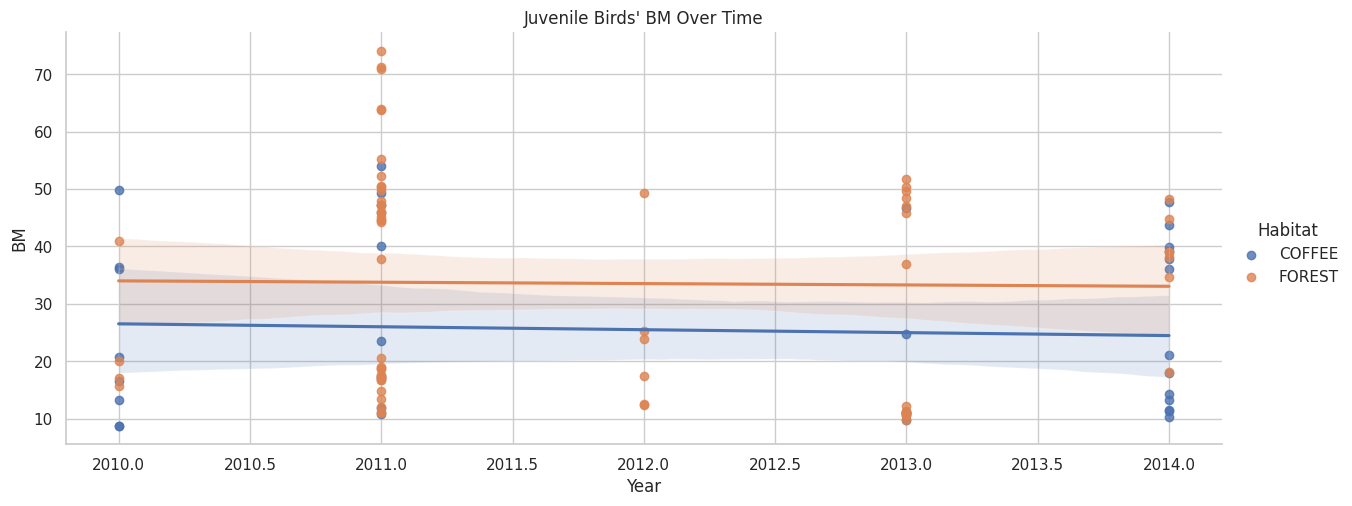

In [175]:
sns.set()
sns.set_style('whitegrid')

ax = sns.lmplot(data = df_BMJuv, y = 'BM', x = 'Year', hue = 'Habitat', height = 5, aspect = 2.5)

# .set(title = ) function allows there to be a title in the seaborn plot
ax.set(title = 'Juvenile Birds\' BM Over Time')




> As we can see from above, the Juvenile birds both decrease over the 5 year span of data collection. Although there is a large margin of error, the data suggests that juvenile birds in shade coffee environments are decreasing at a faster rate than in their native forests. This supports the previous graphs that indicated juvenile birds were appearing less in shade coffee environments.



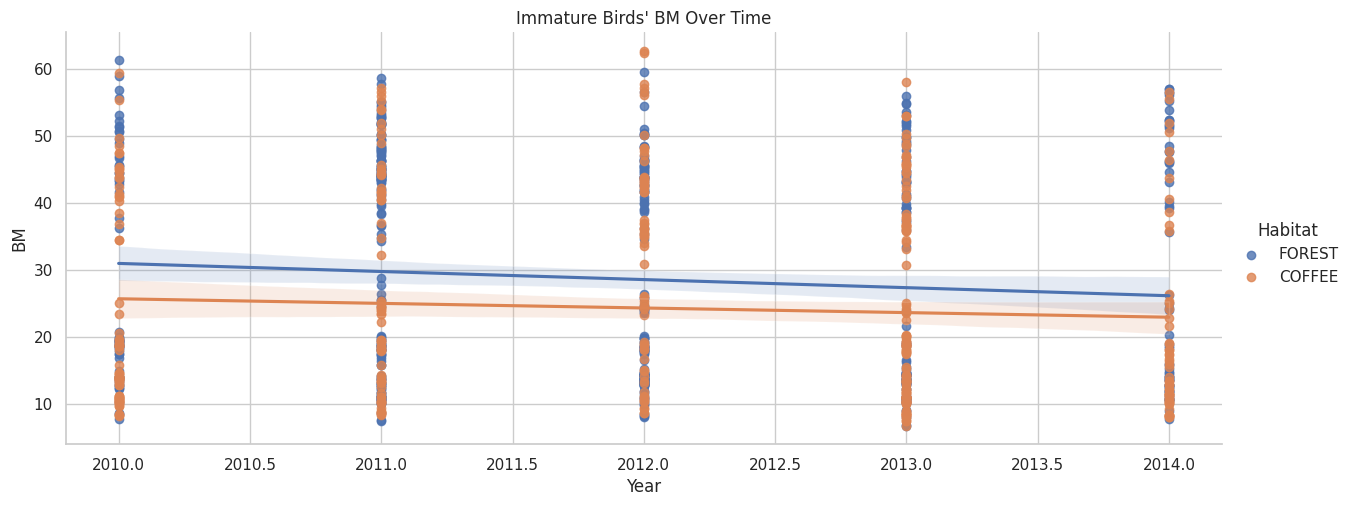

In [150]:
sns.set()
sns.set_style('whitegrid')

ax = sns.lmplot(data = df_BMImm, y = 'BM', x = 'Year', hue = 'Habitat', height = 5, aspect = 2.5)

# .set(title = ) function allows there to be a title in the seaborn plot
ax.set(title = 'Immature Birds\' BM Over Time')

#Through the set_xticklabels we are able to remove there being any half years (ie. 2010.5)—achieving a cleaner graph

> Looking at the graph above, the Immature birds both decrease over the 5 year span of data collection. The margin of error is relatively small and the data suggests that immature birds in native tropical forest environments are decreasing at a faster rate than in shade coffee farms. This aligns with the previous graph we created indicating that immature birds were gravitating toward shade coffee environments instead of their native one.

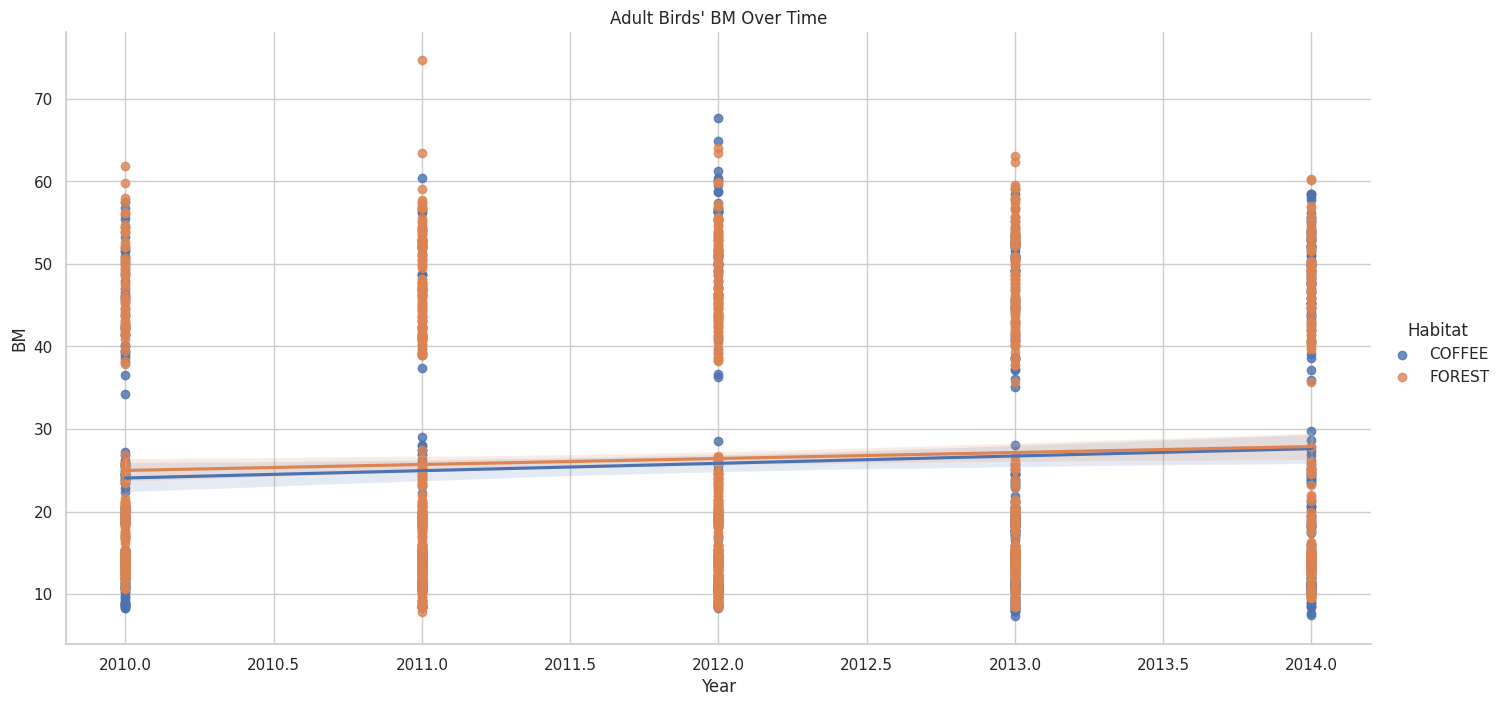

In [171]:
sns.set()
sns.set_style('whitegrid')

ax = sns.lmplot(data = df_BMAd, y = 'BM', x = 'Year', hue = 'Habitat', height = 7, aspect = 2)

# .set(title = ) function allows there to be a title in the seaborn plot
ax.set(title = 'Adult Birds\' BM Over Time')

#Through the set_xticklabels we are able to remove there being any half years (ie. 2010.5)—achieving a cleaner graph


> The plotted linear regression model for above contrasts the trend shown in Immature & Juvenile birds. Unlike the other two age ranges, the Adult birds actually noticeably increase in mass over the 5 year span for both birds residing in shade coffee and native forest environments. Moreover, not only is the margin of error (translucent bars) much smaller in comparison, but the birds in shade coffee farms are actually increasing in mass at a more substantial rate than birds who are in native forests. If we look at our previous plot (comparing proportions of birds found @ coffee habitat), this trend is supported by that data. In the first plot, not only did adult birds in general appear more often in the coffee farms (relative to native forests), but they also had the greatest slope compared to other bird ages.




In [179]:
''' To get a closer look at the data, we can perform a OLS model
to get deeper insight into our data! Specifically, we are interested at looking at adult
birds!'''


x = sm.add_constant(forAdBM['Year'])
y = forAdBM['BM']

ols_model = sm.OLS(y, x).fit()
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:                     BM   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     5.422
Date:                Mon, 21 Apr 2025   Prob (F-statistic):             0.0201
Time:                        18:43:34   Log-Likelihood:                -3963.7
No. Observations:                 941   AIC:                             7931.
Df Residuals:                     939   BIC:                             7941.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1762.6955    768.128     -2.295      0.0

In [192]:
''' To get a closer look at the data, we can perform a OLS model
to get deeper insight into our data! Specifically, we are interested at looking at adult
birds! '''

#here we are looking at adults in shade coffee habitats specifically


x = sm.add_constant(cofAdBM['Year'])
y = cofAdBM['BM']

ols_model = sm.OLS(y, x).fit()
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:                     BM   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     4.919
Date:                Mon, 21 Apr 2025   Prob (F-statistic):             0.0267
Time:                        18:58:29   Log-Likelihood:                -5667.6
No. Observations:                1355   AIC:                         1.134e+04
Df Residuals:                    1353   BIC:                         1.135e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1431.3660    657.272     -2.178      0.0

## Implications of Analysis:



From our analysis, the main takeaways found are that birds are likely gravitating toward shade coffee land cover as opposed to their natural habitat. Although the research surrounding shade coffee farms acting as a substitute for birds native environment is very preliminary, one idea worth further exploring is that shade coffee may act as a bubble of biodiversity admist the troubles deforestation and climate change bring about. Specifically, shade coffee environments not only do not bare the risk of being cut down, but because they are being utilized for agriculture, they also recieve ample water as well. Consequently, birds may be more apt to live in/near shade coffee farms because they may present less biodiversity than a typical rainforest would, but they provide birds with a more stable environment.